## Oppstart

In [9]:
from dhlab.module_update import update, css
import dhlab.nbtext as nb
from dhlab.nbtext import get_urn, make_graph, get_urn, relaterte_ord, navn, totals
import dhlab.graph_networkx_louvain as gnl
import dhlab.token_map as tm
%matplotlib inline

plot = lambda x,  lw=3, alpha= 0.7: x.plot(figsize=(15,6), lw=lw, alpha=alpha)


In [2]:
import warnings
warnings.filterwarnings('ignore')

css()

## Navn i bøker

Tolstojs Krig og Fred. Henter URN-er med 

In [3]:

# Fetch URNs

urns = nb.book_urn(author = 'tolstoj%',  title = '%krig%', limit=100)
urns

[[2008011501085, 'Tolstoj, L.N.', 'Krig og fred', 1993],
 [2007111904099, 'Tolstoj, L.N.', 'Krig og fred', 1993],
 [2007041001053, 'Tolstoj, L.N.', 'Krig og fred', 1962],
 [2011061508082, 'Tolstoj, L.N.', 'Krig og fred', 2008],
 [2007032601072, 'Tolstoj, L.N.', 'Krig og fred', 1962],
 [2007032801091, 'Tolstoj, L.N.', 'Krig og fred', 1962],
 [2011063022003, 'Tolstoj, L.N.', 'Krig og fred', 1967],
 [2015091006105, 'Tolstoj, L.N.', 'Krig og fred', 2004],
 [2008042300036, 'Tolstoj, L.N.', 'Krig og fred', 1951],
 [2014101408145, 'Tolstoj, L.N.', 'Krig og fred', 1929],
 [2011063022002, 'Tolstoj, L.N.', 'Krig og fred', 1967],
 [2008110400150, 'Tolstoj, L.N.', 'Krig og fred', 2001],
 [2011030308018, 'Tolstoj, L.N.', 'Krig og fred', 2003],
 [2008101004071, 'Tolstoj, L.N.', 'Krig og fred', 2000],
 [2007051400011, 'Tolstoj, L.N.', 'Krig og fred', 1968],
 [2007050800051, 'Tolstoj, L.N.', 'Krig og fred', 1962],
 [2012011008041, 'Tolstoj, L.N.', 'Krig og fred', 1951],
 [2007111900105, 'Tolstoj, L.N.

Her ønsker vi den komplette, så vi kan bruke kommandoen `book_count()` for å få antallet ord i hver bok.

In [4]:
[nb.book_count(x) for x in urns]

[{2008011501085: 127646},
 {2007111904099: 133554},
 {2007041001053: 91212},
 {2011061508082: 294884},
 {2007032601072: 102980},
 {2007032801091: 91485},
 {2011063022003: 173184},
 {2015091006105: 126615},
 {2008042300036: 141243},
 {2014101408145: 100031},
 {2011063022002: 179369},
 {2008110400150: 157120},
 {2011030308018: 168239},
 {2008101004071: 125257},
 {2007051400011: 131527},
 {2007050800051: 99532},
 {2012011008041: 127143},
 {2007111900105: 163601},
 {2015110507062: 88222},
 {},
 {2007050801009: 141332},
 {2011063022004: 124729},
 {2015091406029: 98414},
 {2011061508081: 324509},
 {2008042400005: 122127},
 {2011063023001: 163241},
 {2007041101090: 98936},
 {2011081020006: 163906},
 {2008102204034: 133546},
 {2014100308012: 90432},
 {2008102200095: 163366}]

Her ser det ut som at 2011061508082 med 294 884 ord er størst.

Vi legger URN-en i en variabel. Det gjør det lettere å gjøre endringer, og kjøre notebooken på andre bøker.

In [6]:
BOOK = 2011061508082

## Navn

Navn er alt som starter med store bokstaver, men som også forekommer utenom punktum. Kommando er  'names()'.

In [10]:
wp = nb.names(BOOK, cutoff=15)
tm.show_names(wp)

Lag 1

    Pierre - 1032
    Natasja - 439
    Moskva - 411
    Napoleon - 381
    Maria - 347
    Ja - 305
    Kutuzov - 301
    Andrej - 297
    Dem - 235
    Deres - 211
    Petja - 209
    Nikolaj - 208
    Nei - 162
    Denisov - 155
    Rostov - 148
    Alpatytsj - 131
    Sonja - 125
    Gud - 101
    Borodino - 100
    Smolensk - 97
    Balasjev - 90
    Napoleons - 90
    Rastoptsjin - 89
    Russland - 84
    Petersburg - 83
    Aleksander - 72
    Dolokhov - 71
    Bennigsen - 62
    Pierres - 57
    Majestet - 55
    Dron - 54
    Karatajev - 51
    Tikhon - 51
    Barclay - 47
    Gory - 43
    Helene - 43
    Paris - 43
    Pfuhl - 43
    Anna - 42
    Mile - 39
    Dessalles - 38
    Guds - 38
    Lysyje - 37
    Moskvas - 37
    Bogutsjarovo - 36
    Bourienne - 36
    Davout - 36
    Rostovs - 36
    Iljin - 35
    Natasjas - 34
    Vasilij - 31
    Vilna - 30
    Bolkonskij - 28
    Jermolov - 28
    Murat - 28
    Gerasim - 27
    Pavlovna - 27
    Andrejs - 26
    A

Noe kan fjernes, enkelte ord dukker opp som ikke er navn.

In [14]:
tm.token_map(wp)

[(('Ah',), ('Ah',)),
 (('Aleksander',), ('Aleksander',)),
 (('Aleksejevitsj',), ('Aleksejevitsj',)),
 (('Alpatytsj',), ('Alpatytsj',)),
 (('Andrej',), ('Andrej', 'Bolkonskij')),
 (('Andrejs',), ('Andrej', 'Bolkonskij')),
 (('Anna',), ('Anna', 'Pavlovna')),
 (('Araktsjejev',), ('Napoleons', 'Araktsjejev')),
 (('Austerlitz',), ('Austerlitz',)),
 (('Bagration',), ('Bagration',)),
 (('Balasjev',), ('Balasjev',)),
 (('Barclay',), ('Barclay',)),
 (('Beausset',), ('Beausset',)),
 (('Bennigsen',), ('Bennigsen',)),
 (('Berezina',), ('Berezina',)),
 (('Berg',), ('Berg',)),
 (('Bilibin',), ('Bilibin',)),
 (('Bogutsjarovo',), ('Bogutsjarovo',)),
 (('Bolkonskij',), ('Andrej', 'Bolkonskij')),
 (('Borodino',), ('Borodino',)),
 (('Bourienne',), ('Mile', 'Bourienne')),
 (('Davout',), ('Davout',)),
 (('Dem',), ('Dem',)),
 (('Denisov',), ('Denisov',)),
 (('Deres',), ('Deres', 'Majestet')),
 (('Dessalles',), ('Dessalles',)),
 (('Dokhturov',), ('Dokhturov',)),
 (('Dolokhov',), ('Dolokhov',)),
 (('Drissa',)

## Lag navnegrafen

Kommando er `make_network_name(<URN>, <liste over ord>)` fra modulen `token_map`

In [18]:
graf = tm.make_network_name_graph(BOOK, tokens=wp)

Vis grafen med `show_graph`

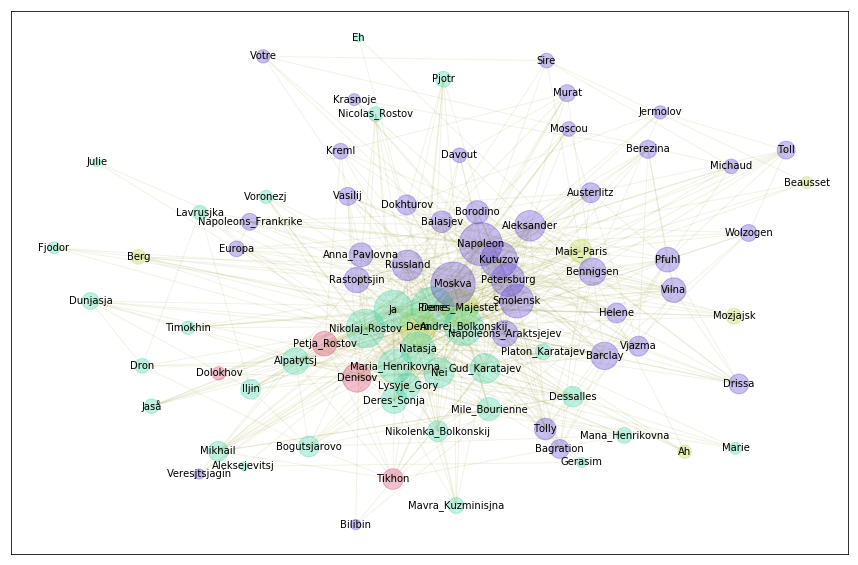

In [19]:
gnl.show_graph(graf, spread=1.8)

## Studer hvordan navnene henger sammen

In [20]:
gnl.show_communities(graf)

Dem-Deres_Majestet :  Dem, Deres_Majestet, Mais_Paris, Mozjajsk, Berg, Ah, Beausset

Pierre-Nikolaj_Rostov :  Pierre, Nikolaj_Rostov, Andrej_Bolkonskij, Ja, Natasja, Maria_Henrikovna, Nei, Gud_Karatajev, Alpatytsj, Deres_Sonja, Lysyje_Gory, Mile_Bourienne, Bogutsjarovo, Dessalles, Nikolenka_Bolkonskij, Mikhail, Iljin, Dunjasja, Platon_Karatajev, Mavra_Kuzminisjna, Mana_Henrikovna, Pjotr, Lavrusjka, Jaså, Dron, Nicolas_Rostov, Timokhin, Voronezj, Marie, Fjodor, Gerasim, Eh, Julie, Aleksejevitsj

Moskva-Napoleon :  Moskva, Napoleon, Kutuzov, Smolensk, Petersburg, Russland, Aleksander, Bennigsen, Barclay, Napoleons_Araktsjejev, Rastoptsjin, Pfuhl, Vilna, Anna_Pavlovna, Borodino, Tolly, Balasjev, Drissa, Helene, Austerlitz, Vjazma, Dokhturov, Bagration, Toll, Berezina, Vasilij, Napoleons_Frankrike, Murat, Wolzogen, Kreml, Europa, Sire, Michaud, Moscou, Davout, Jermolov, Votre, Krasnoje, Bilibin, Veresjtsjagin

Denisov-Petja_Rostov :  Denisov, Petja_Rostov, Tikhon, Dolokhov



Clustrene kan brukes til historieplotting (se også kapittel narrative grafer)

In [21]:
gcom = gnl.community_dict(graf)
gcom

{'Dem-Deres_Majestet': ['Dem',
  'Deres_Majestet',
  'Mais_Paris',
  'Mozjajsk',
  'Berg',
  'Ah',
  'Beausset'],
 'Pierre-Nikolaj_Rostov': ['Pierre',
  'Nikolaj_Rostov',
  'Andrej_Bolkonskij',
  'Ja',
  'Natasja',
  'Maria_Henrikovna',
  'Nei',
  'Gud_Karatajev',
  'Alpatytsj',
  'Deres_Sonja',
  'Lysyje_Gory',
  'Mile_Bourienne',
  'Bogutsjarovo',
  'Dessalles',
  'Nikolenka_Bolkonskij',
  'Mikhail',
  'Iljin',
  'Dunjasja',
  'Platon_Karatajev',
  'Mavra_Kuzminisjna',
  'Mana_Henrikovna',
  'Pjotr',
  'Lavrusjka',
  'Jaså',
  'Dron',
  'Nicolas_Rostov',
  'Timokhin',
  'Voronezj',
  'Marie',
  'Fjodor',
  'Gerasim',
  'Eh',
  'Julie',
  'Aleksejevitsj'],
 'Moskva-Napoleon': ['Moskva',
  'Napoleon',
  'Kutuzov',
  'Smolensk',
  'Petersburg',
  'Russland',
  'Aleksander',
  'Bennigsen',
  'Barclay',
  'Napoleons_Araktsjejev',
  'Rastoptsjin',
  'Pfuhl',
  'Vilna',
  'Anna_Pavlovna',
  'Borodino',
  'Tolly',
  'Balasjev',
  'Drissa',
  'Helene',
  'Austerlitz',
  'Vjazma',
  'Dokhturov

Henter ut vekstdiagrammet med `plot_book_wordbags(<urn>, <ordsekker>, window=<..>)` og plotter med `plot`.

In [24]:
wp_diagram = nb.plot_book_wordbags(BOOK, gcom,window = 10000)

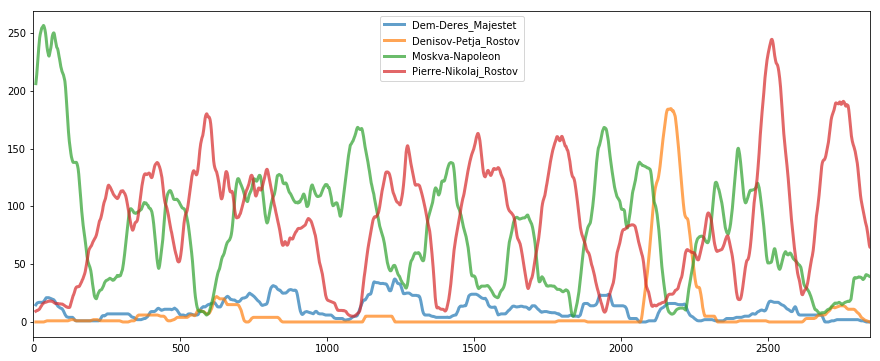

In [25]:
plot(wp_diagram.rolling(window=10).mean());